In [1]:
!pip install xgboost --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from xgboost import XGBClassifier
import joblib


In [2]:
df = pd.read_csv("churn_data.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Fiber optic,No,No,Yes,No,Yes,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,Yes,Yes,45,No,No,DSL,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})
df = df.drop('customerID', axis=1)

binary_cols = ['Partner','Dependents','PhoneService','PaperlessBilling']
for c in binary_cols:
    df[c] = df[c].map({'Yes':1,'No':0})

df = pd.get_dummies(df, drop_first=True)

df.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,Contract_One year,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,False,False,False,True,False,False,False,False,True,False
1,0,0,0,34,1,0,56.95,1889.50,0,True,True,False,False,True,False,True,True,False,True
2,0,0,0,2,1,1,53.85,108.15,1,True,True,False,False,False,False,False,False,True,False
3,0,1,1,45,0,0,42.30,1840.75,0,True,False,True,False,True,False,False,True,False,False
4,0,0,0,2,1,1,70.70,151.65,1,False,True,True,False,False,True,False,False,True,False


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)



In [9]:
model = XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]


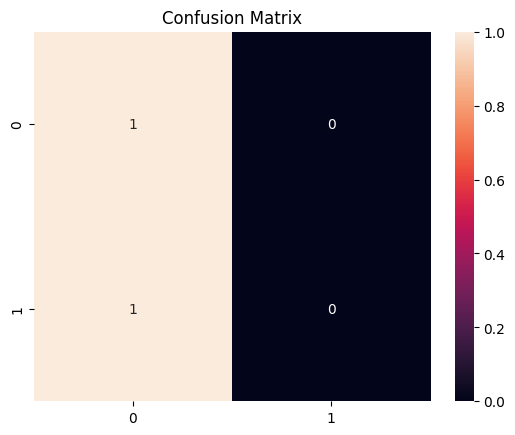

In [10]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()


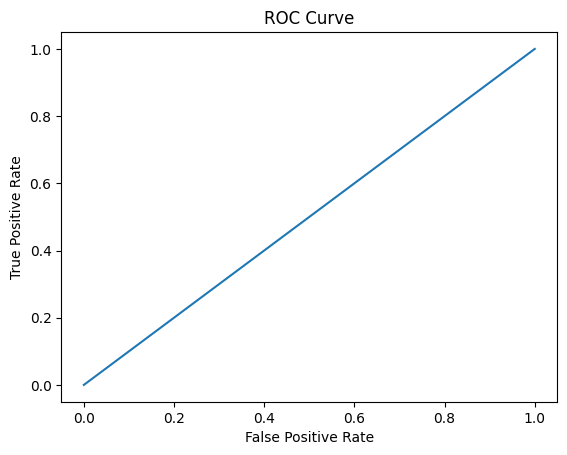

In [11]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.savefig("roc_auc.png")
plt.show()


In [12]:
joblib.dump(model, "churn_model.pkl")


['churn_model.pkl']